# What is a Computer Vision Problem : 
* Binary / Multi Class Classification 
* Object Detection / Tesla Autopilot 

In [1]:
# Convolutional Neural Network 

In [2]:
"""
Computer vision is the practice of writing algorithms which can discover patterns in visual data, 
such as camera of a self driving car recognizing the vehicle in front 
"""

'\nComputer vision is the practice of writing algorithms which can discover patterns in visual data, \nsuch as camera of a self driving car recognizing the vehicle in front \n'

In [3]:
## Get the data for food vision 
# !pip install kagglehub

In [4]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("dansbecker/food-101")

# print("Path to dataset files:", path)

In [5]:
import pandas as pd 

labels = pd.read_csv('../data/food_classification/train_img.csv')

In [6]:
labels.head()

ImageId               ClassName
0  f27632d7e5.jpg                   water
1  efa87919ed.jpg  pizza-margherita-baked
2  4f169e8c8d.jpg                broccoli
3  a6956654bf.jpg  salad-leaf-salad-green
4  d99ce8c3bf.jpg                     egg

In [7]:
labels.describe

<bound method NDFrame.describe of              ImageId                 ClassName
0     f27632d7e5.jpg                     water
1     efa87919ed.jpg    pizza-margherita-baked
2     4f169e8c8d.jpg                  broccoli
3     a6956654bf.jpg    salad-leaf-salad-green
4     d99ce8c3bf.jpg                       egg
...              ...                       ...
9318  ba8233c7d2.jpg  bread-french-white-flour
9319  2090043907.jpg                  wine-red
9320  8762d1cefd.jpg                    carrot
9321  28e7439245.jpg                  broccoli
9322  ba263cfb41.jpg                  cucumber

[9323 rows x 2 columns]>

In [8]:
# import zipfile 

# zip_ref = zipfile.ZipFile("../data/pizza_steak.zip") 
# zip_ref.extractall() 
# zip_ref.close()

In [9]:
## Inspect the data (become one with it) 
!ls ../data/pizza_steak/test/pizza/

000001.jpg   000096.jpg   000191.jpg  000288.jpg   2019408.jpg	3486640.jpg
000002.jpg   000097.jpg   000192.jpg  000289.jpg   204151.jpg	3497151.jpg
000003.jpg   000098.jpg   000193.jpg  000290.jpg   2082495.jpg	3581181.jpg
000004.jpg   000099.jpg   000194.jpg  000291.jpg   2101820.jpg	3586083.jpg
000005.jpg   000100.jpg   000195.jpg  000292.jpg   2111981.jpg	3612981.jpg
000006.jpg   000101.jpg   000196.jpg  000293.jpg   2124579.jpg	3650727.jpg
000007.jpg   000102.jpg   000197.jpg  000294.jpg   212995.jpg	3669673.jpg
000008.jpg   000103.jpg   000198.jpg  000295.jpg   2157510.jpg	3724187.jpg
000009.jpg   000104.jpg   000199.jpg  000296.jpg   2161321.jpg	3724353.jpg
000010.jpg   000105.jpg   000200.jpg  000297.jpg   2165223.jpg	3724416.jpg
000011.jpg   000106.jpg   000201.jpg  000298.jpg   2195935.jpg	3728155.jpg
000012.jpg   000107.jpg   000202.jpg  000299.jpg   2203687.jpg	3729167.jpg
000013.jpg   000108.jpg   000203.jpg  000300.jpg   2218680.jpg	373847.jpg
000014.jpg   000109.jpg   00

In [10]:
!pwd

/workspace/01_tensorflow_htv/03_tensorflow_neural_network_classification/nb


In [11]:
import os
pizza_train_files = os.listdir("../data/pizza_steak/train/pizza/")
path = "/workspace/01_tensorflow_htv/03_tensorflow_neural_network_classification/data" 
pizza_train_filepaths = [path + "/pizza_steak/train/pizza/" + file for file in pizza_train_files if not file.startswith(".")]

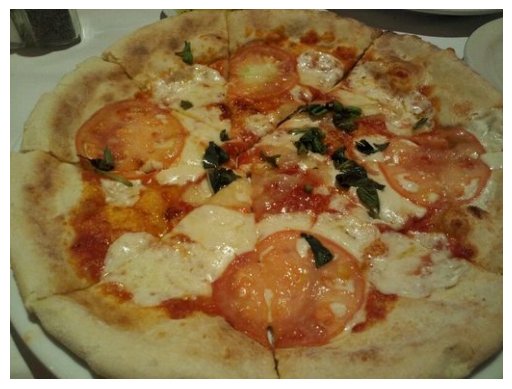

In [12]:
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

img = Image.open(pizza_train_filepaths[0])

plt.imshow(img)
plt.axis("off")
plt.show()

In [13]:
len(pizza_train_filepaths)

750

In [14]:
for dirpath, dirnames, filenames in os.walk("../data/pizza_steak"): 
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 3 directories and 0 images in '../data/pizza_steak'
There are 2 directories and 0 images in '../data/pizza_steak/test'
There are 0 directories and 548 images in '../data/pizza_steak/test/pizza'
There are 0 directories and 574 images in '../data/pizza_steak/test/steak'
There are 2 directories and 0 images in '../data/pizza_steak/train'
There are 0 directories and 750 images in '../data/pizza_steak/train/pizza'
There are 0 directories and 750 images in '../data/pizza_steak/train/steak'
There are 2 directories and 0 images in '../data/pizza_steak/valid'
There are 1 directories and 162 images in '../data/pizza_steak/valid/pizza'
There are 0 directories and 13 images in '../data/pizza_steak/valid/pizza/.ipynb_checkpoints'
There are 1 directories and 179 images in '../data/pizza_steak/valid/steak'
There are 0 directories and 6 images in '../data/pizza_steak/valid/steak/.ipynb_checkpoints'


In [15]:
import pathlib 
import numpy as np 

# Get classnames programmatically
class_names = os.listdir("../data/pizza_steak/train/") 
class_names

# OR 

data_dir = pathlib.Path("../data/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [16]:
# Visualize image 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import random

def view_random_image(target_dir, target_class): 
    # setup target folder 
    target_folder = os.path.join(target_dir, target_class)  
    data_type = target_dir.split("/")[-1]

    # Get a random image path  
    random_image = random.sample(os.listdir(target_folder), 1)
    # Read in the image  and plot it using matplotlib 

    img = mpimg.imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(f"{target_class} \n {data_type} \n {img.shape}", fontsize=10) 
    plt.axis("off"); 
    return img

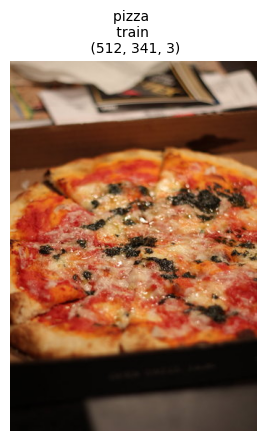

In [17]:
img = view_random_image("../data/pizza_steak/train", "pizza")
# img

In [18]:
import tensorflow as tf 

tf.constant(img) 

img_resized = tf.image.resize(img, [224, 224])

img_resized.shape

TensorShape([224, 224, 3])

In [19]:
## Scaling / Normalizing the data 

## Create a CNN model  E2E Example 

1. Load images 
2. Preprocess imagess
3. Build a CNN model to find patterns
4. Compile CNN Model
5. Fit the CNN to training data 

In [20]:
import tensorflow as tf 
import keras 

# set the seed
keras.utils.set_random_seed(42)

# Preprocess data (get all pixel values betweeen 0 & 1 - Scaling and Normalization)

# Load the images 
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/pizza_steak/train/",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/pizza_steak/test/",
    image_size=(img_height, img_width),
    batch_size=batch_size, 
    shuffle=False
)

normalization_layer = keras.layers.Rescaling(1./255)
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) 
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


## Build a CNN Model  

model_1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=10, 
                       kernel_size=3, 
                       activation='relu', 
                       input_shape=(img_height, img_width, 3)), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(2), 
    keras.layers.Flatten(), 
    keras.layers.Dense(1, activation="sigmoid")
], name="Model_1")

model_1.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
) 

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=8,
        restore_best_weights=True,
        verbose=0
    ),
    
    # keras.callbacks.ReduceLROnPlateau(
    #     monitor="val_loss",
    #     factor=0.2,        # how much to reduce LR by
    #     patience=8,        # reduce LR earlier than EarlyStopping
    #     min_lr=1e-7,
    #     verbose=0
    # ),
    
    keras.callbacks.ModelCheckpoint(
        filepath="best_model.keras",
        monitor="val_loss",
        save_best_only=True,
        save_weights_only=False,
        verbose=0
    ),
    
    keras.callbacks.TensorBoard(
        log_dir="logs",
        histogram_freq=1
    )
]

model_1.summary()

history_1 = model_1.fit(
    normalized_train_ds, 
    epochs=50, 
    validation_data=normalized_test_ds,
    callbacks=callbacks,
    verbose=2
)

Found 1500 files belonging to 2 classes.
Found 1122 files belonging to 2 classes.


Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,101 (121.49 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
47/47 - 8s - 181ms/step - accuracy: 0.6960 - loss: 0.5687 - val_accuracy: 0.7914 - val_loss: 0.4672
Epoch 2/50
47/47 - 3s - 60ms/step - accuracy: 0.8133 - loss: 0.4286 - val_accuracy: 0.7692 - val_loss: 0.4943
Epoch 3/50
47/47 - 3s - 57ms/step - accuracy: 0.8220 - loss: 0.4025 - val_accuracy: 0.7335 - val_loss: 0.5651
Epoch 4/50
47/47 - 3s - 58ms/step - accuracy: 0.8420 - loss: 0.3733 - val_accuracy: 0.8137 - val_loss: 0.4226
Epoch 5/50
47/47 - 3s - 57ms/step - accuracy: 0.8740 - loss: 0.3222 - val_accuracy: 0.8155 - val_loss: 0.4518
Epoch 6/50
47/47 - 3s - 58ms/step - accuracy: 0.9040 - loss: 0.2484 - val_accuracy: 0.8111 - val_loss: 0.4834
Epoch 7/50
47/47 - 3s - 57ms/step - accuracy: 0.9367 - loss: 0.1802 - val_accuracy: 0.7504 - val_loss: 0.7625
Epoch 8/50
47/47 - 3s - 58ms/step - accuracy: 0.9500 - loss: 0.1556 - val_accuracy: 0.7727 - val_loss: 0.5731
Epoch 9/50
47/47 - 3s - 57ms/step - accuracy: 0.9767 - loss: 0.0845 - val_accuracy: 0.7594 - val_loss: 0.7772
Epoch 10/

In [21]:
model_1.evaluate(test_ds)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6540 - loss: 63.5473


[67.98115539550781, 0.6631016135215759]

In [22]:
class_names = train_ds.class_names
print(class_names)

['pizza', 'steak']


In [23]:
print(f"Class names: {train_ds.class_names}")

for images, labels in train_ds.take(1):
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
    print(f"Batch labels (raw): {labels.numpy()}")
    break


Class names: ['pizza', 'steak']
Batch images shape: (32, 224, 224, 3)
Batch labels shape: (32,)
Batch labels (raw): [0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0]


In [24]:
import matplotlib.pyplot as plt
import math
import random

def plot_images_from_dataset(dataset, class_names, n=12):
    images, labels = next(iter(dataset))
    labels = labels.numpy()
    
    idxs = random.sample(range(len(images)), min(n, len(images)))
    
    rows = math.ceil(len(idxs)/4)
    plt.figure(figsize=(12, rows*3))
    
    for i, idx in enumerate(idxs):
        plt.subplot(rows, 4, i+1)
        plt.imshow(images[idx].numpy().astype("uint8"))
        plt.title(f"{class_names[labels[idx]]} (label {labels[idx]})")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


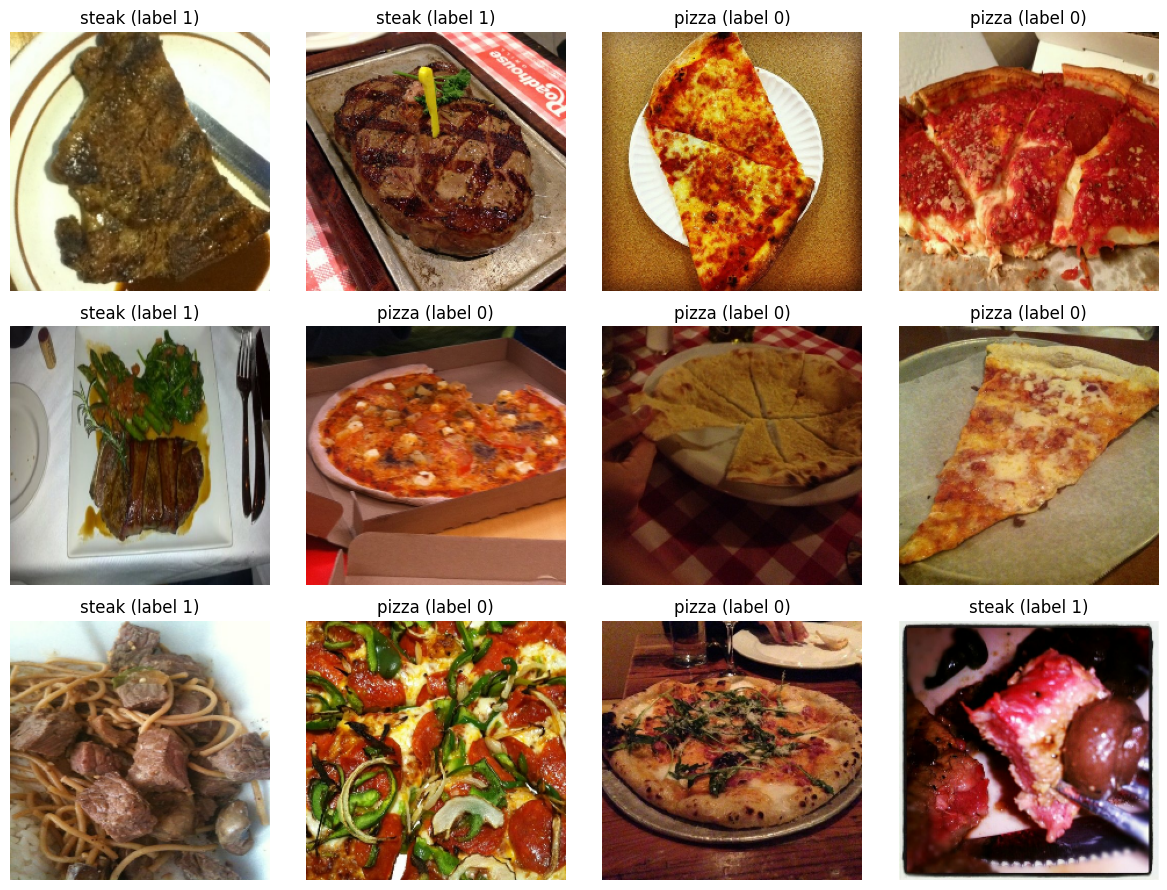

In [25]:
plot_images_from_dataset(dataset=train_ds, class_names=class_names, n=12)

In [26]:
for image_batch, labels_batch in train_ds: 
    print(image_batch.shape) 
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


## Homework / Practice & Exercise 
https://poloclub.github.io/cnn-explainer/

In [27]:
## Trying our data on non CNN Model 

## Model-2

keras.utils.set_random_seed(42)

model_2 = keras.Sequential([
   keras.layers.Flatten(input_shape=(img_height, img_width, 3)),
   keras.layers.Dense(150, activation='relu'), 
   keras.layers.Dense(150, activation='relu'),
    #tf.keras.layers.Dense(150, activation='relu'),
    #tf.keras.layers.Dense(150, activation='relu'),
   keras.layers.Dense(1, activation='sigmoid')
    
])

model_2.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_2.summary()


history_2 = model_2.fit(
    normalized_train_ds, 
    epochs=50, 
    validation_data=normalized_test_ds, 
    # callbacks=callbacks, 
    verbose=0
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │    22,579,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,602,151 (86.22 MB)

 Trainable params: 22,602,151 (86.22 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_2.evaluate(normalized_test_ds)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6997 - loss: 1.0315


[0.9815619587898254, 0.7085561752319336]

In [29]:
y_preds = model_1.predict(normalized_test_ds)
y_preds_act = np.round(np.squeeze(y_preds))
y_preds_act[:10]

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Binary Classification 

1. Become one with the data
2. Preprocess data (scale and normalize the data)
3. Create a model
4. Fit the models
5. Evaluate the model
6. Adjust different paramd and improve the model
7. Repeat until satisfied 

## Become one with the data 

In [30]:
def plot_n_number_of_images(n=12): 
    num_row = math.ceil(n/4)

    plt.figure(figsize=(10, num_row*3))
    for i in range(n): 
        plt.subplot(num_row, 4, i+1)
        data_type = random.sample(["train", "test"], 1)[0] 
        class_name = random.sample(["pizza", "steak"], 1)[0] 
        
        view_random_image(target_dir="../data/pizza_steak/" + data_type , 
                            target_class=class_name)



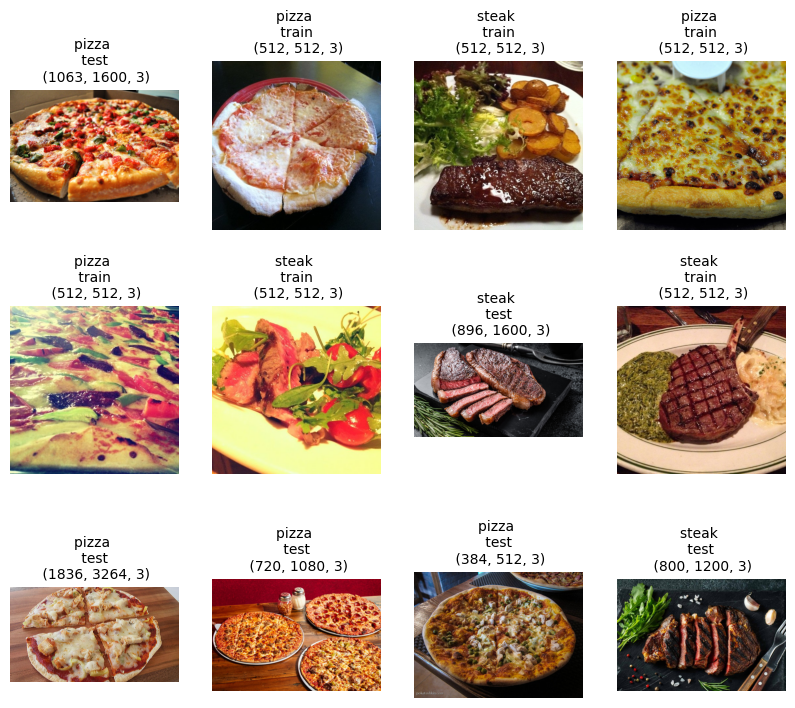

In [31]:
plot_n_number_of_images(n=12)

In [32]:
# Preprocess the data 

train_dir = "../data/pizza_steak/train/" 
test_dir = "../data/pizza_steak/test/"

# turn data in batches 

batch_size = 32 
img_height = 224 
img_width = 224 

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, 
    image_size=(img_height, img_width), 
    batch_size=batch_size, 
    shuffle=True, 
    seed=42
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, 
    image_size=(img_height, img_width), 
    batch_size=batch_size, 
    shuffle=True, 
    seed=42
) 

normalizer =keras.layers.Rescaling(1./255) 
normalized_train_ds = train_ds.map(lambda x, y: (normalizer(x), y)) 
normalized_test_ds = test_ds.map(lambda x, y: (normalizer(x), y))



Found 1500 files belonging to 2 classes.
Found 1122 files belonging to 2 classes.


In [33]:
!nvidia-smi --query-gpu=name --format=csv,noheader

NVIDIA GeForce RTX 5070 Ti Laptop GPU


In [34]:
data, labels = next(iter(normalized_train_ds))
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int32)>

# 3. Create a CNN model (start with a baseline) 

In [35]:
# Make the creating of our model a little easier 
from keras.losses import BinaryCrossentropy 
from keras.optimizers import Adam 
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation 
from keras.models import Sequential 

# create the model - A 3-layer convolutional neural network 
model_3 = Sequential([
    Conv2D(filters=10, 
          kernel_size=3, 
          strides=1, 
          padding="valid", 
          activation='relu', 
          input_shape=(img_height, img_width, 3)),
    Conv2D(10, 3, activation="relu"), 
    Conv2D(10, 3, activation="relu"), 
    # MaxPool2D(pool_size=2, 
    #          padding="valid")
    Flatten(), 
    Dense(1, activation="sigmoid")
])

model_3.compile(
    loss=BinaryCrossentropy(), 
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [36]:
len(normalized_train_ds), len(normalized_test_ds)

(47, 36)

In [37]:
import os, datetime
import tensorflow as tf

run_id = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("pizza_steaks", "logs", "fit", run_id)

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    write_steps_per_second=True,
    update_freq="epoch",
    profile_batch="10,12",
    embeddings_freq=0,
)


In [38]:
history_3 = model_3.fit(
    normalized_train_ds, 
    validation_data=normalized_test_ds, 
    epochs=5, 
    verbose=1,
    callbacks=[tensorboard_callback]
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.5698 - loss: 5.4266 - val_accuracy: 0.6836 - val_loss: 0.5907
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.7616 - loss: 0.5040 - val_accuracy: 0.7638 - val_loss: 0.4834
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.8174 - loss: 0.4201 - val_accuracy: 0.7620 - val_loss: 0.4932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.8742 - loss: 0.3303 - val_accuracy: 0.7362 - val_loss: 0.5976
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9285 - loss: 0.2017 - val_accuracy: 0.7442 - val_loss: 0.6531


In [39]:
model_3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

In [40]:
model_1.evaluate(normalized_test_ds), model_3.evaluate(normalized_test_ds)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8182 - loss: 0.4145
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7483 - loss: 0.6572


([0.42259857058525085, 0.813725471496582],
 [0.6531062126159668, 0.7442067861557007])

### Evaluating our model 

<Axes: >

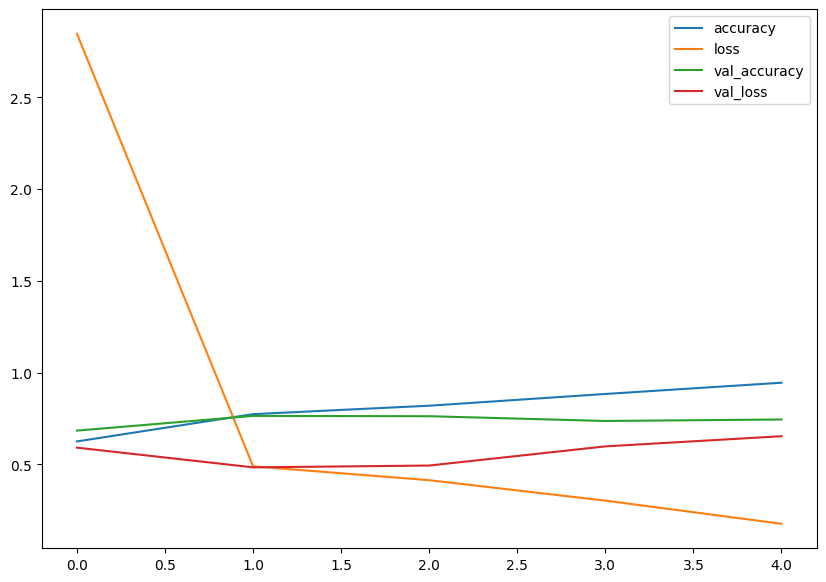

In [41]:
## Plootting training curves 

pd.DataFrame(history_3.history).plot(figsize=(10, 7))

In [42]:
# Plot validation and training curves sepetrately

def plot_loss_curves(history): 
    """
    Returns 
    """

    epochs = range(len(history.history["loss"]))
    loss = history.history["loss"] 
    val_loss = history.history["val_loss"] 

    accuracy = history.history["accuracy"] 
    val_accuracy = history.history["val_accuracy"] 

    plt.plot(epochs, loss, label="tarining_loss")
    plt.plot(epochs, val_loss, label="validation_loss")
    plt.xlabel("epochs")
    plt.title("loss/val_loss") 
    plt.legend();

    plt.figure() 
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="training accuracy")
    plt.xlabel("epochs")
    plt.title("accuracy/val_accuracy") 
    plt.legend();

'\nWhen a model "validation loss" starts the increse, it is likely that over fitting the training data set, \nthis is means the patterns in training data set too well, thus the models ability to generalize the unseen data is being diminished. \n'

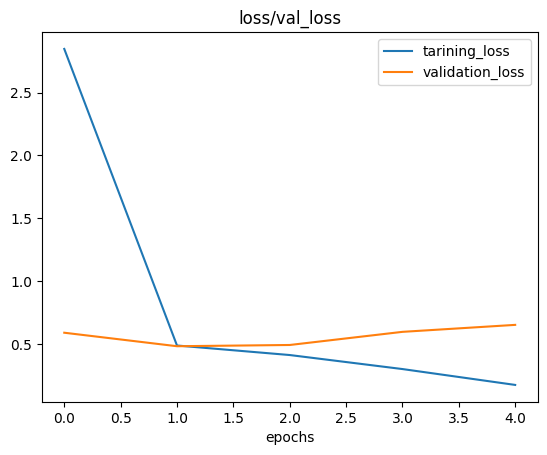

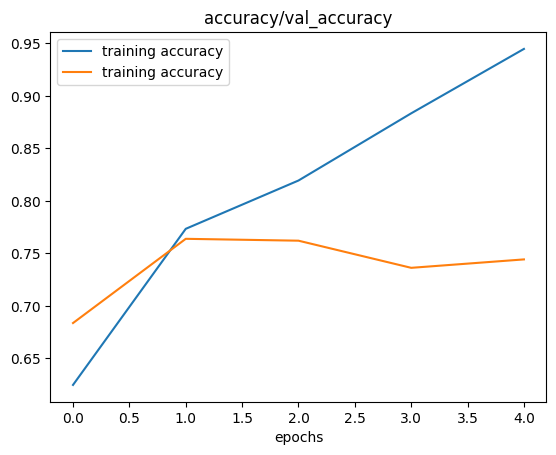

In [43]:
plot_loss_curves(history_3) 
"""
When a model "validation loss" starts the increse, it is likely that over fitting the training data set, 
this is means the patterns in training data set too well, thus the models ability to generalize the unseen data is being diminished. 
"""

## Ways to prevent overfitting 

**Fitting a ml model comes in 3 steps**

1. Create a baseline
2. Beat baseline by overfitting a larger model
3. Reduce overfitting

**Ways to induce overfitting:**

1. Increase the number of conv layers
2. Increase the number of conv filters
3. Add another dense layer to the output of flattened layer


**Reduce overfitting**
1. Add data augmentation
2. Add regularization layers (MaxPool2d)
3. Add more data

In [44]:
# Preprocess the data 

train_dir = "../data/pizza_steak/train/" 
test_dir = "../data/pizza_steak/test/"

# turn data in batches 

batch_size = 32 
img_height = 224 
img_width = 224 

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, 
    image_size=(img_height, img_width), 
    batch_size=batch_size, 
    shuffle=True, 
    seed=42, 
    label_mode = "binary"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, 
    image_size=(img_height, img_width), 
    batch_size=batch_size, 
    shuffle=True, 
    seed=42, 
    label_mode = "binary"
) 

# normalizer =keras.layers.Rescaling(1./255) 
# normalized_train_ds = train_ds.map(lambda x, y: (normalizer(x), y)) 
# normalized_test_ds = test_ds.map(lambda x, y: (normalizer(x), y))



Found 1500 files belonging to 2 classes.
Found 1122 files belonging to 2 classes.


In [45]:
# Adding regularization (MaxPool2D)

In [46]:

## Create the model (new baseline)

model_4 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPool2D(pool_size=2), 
    Conv2D(10, 3, activation='relu'), 
    MaxPool2D(), 
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(), 
    Conv2D(10, 3, activation='relu'), 
    MaxPool2D(), 
    Flatten(), 
    Dense(1, activation='sigmoid')
]) 

model_4.compile(
    loss=BinaryCrossentropy(), 
    optimizer=Adam(), 
    metrics=['accuracy']
)

history_4 = model_4.fit(
                normalized_train_ds, 
                validation_data=(normalized_test_ds), 
                epochs=10, 
                callbacks=[tensorboard_callback], 
                verbose=1
            )

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.5972 - loss: 0.6685 - val_accuracy: 0.6863 - val_loss: 0.5897
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.7520 - loss: 0.5376 - val_accuracy: 0.7531 - val_loss: 0.5149
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8106 - loss: 0.4420 - val_accuracy: 0.7674 - val_loss: 0.4856
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7958 - loss: 0.4458 - val_accuracy: 0.8298 - val_loss: 0.3894
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8349 - loss: 0.3898 - val_accuracy: 0.7852 - val_loss: 0.4340
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8390 - loss: 0.3804 - val_accuracy: 0.8307 - val_loss: 0.3877
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8434 - loss: 0.3687 - val_accuracy: 0.8235 - val_loss: 0.4037
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8371 - loss: 0.3828 - val_accuracy: 0.8253 - 

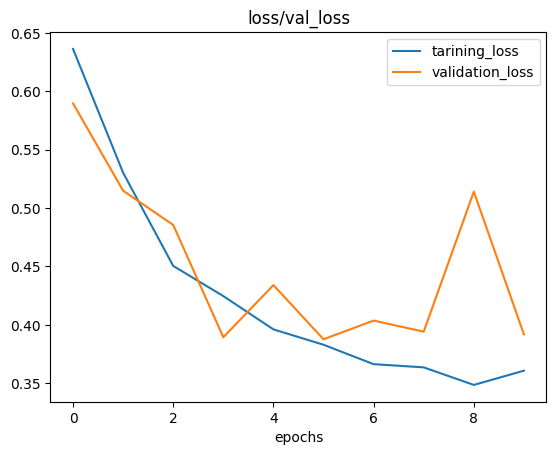

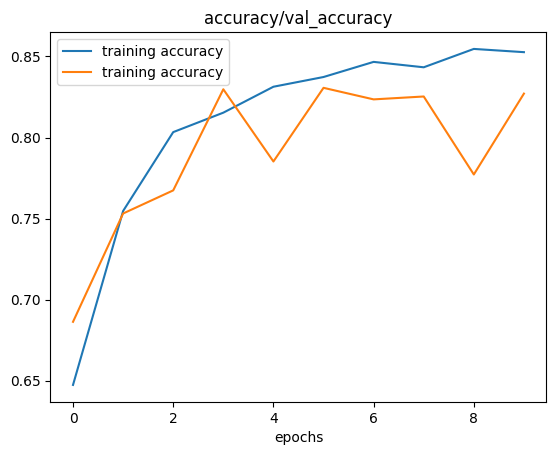

In [47]:
plot_loss_curves(history_4)

In [48]:
model_4.evaluate(normalized_test_ds)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8266 - loss: 0.3892


[0.39184343814849854, 0.8270944952964783]

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,171 (16.29 KB)

 Trainable params: 4,171 (16.29 KB)

 Non-trainable params: 0 (0.00 B)

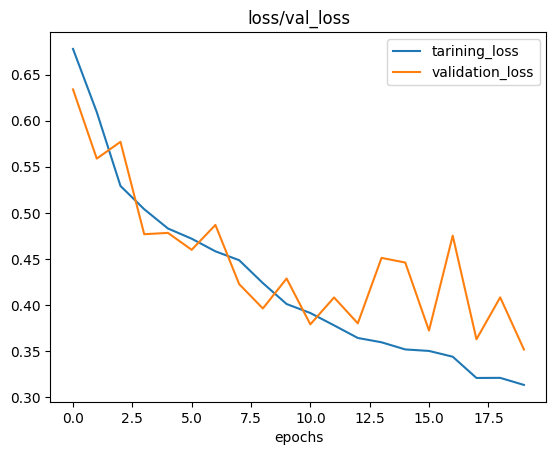

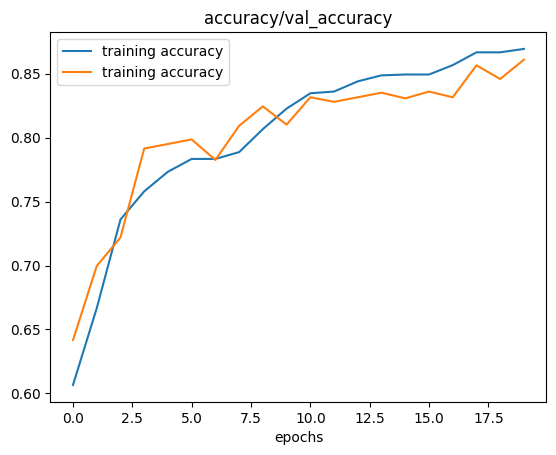

In [49]:

## Create the model (new baseline)

model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPool2D(pool_size=2), 
    Conv2D(10, 3, activation='relu'), 
    MaxPool2D(), 
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(), 
    Conv2D(10, 3, activation='relu'), 
    MaxPool2D(), 
    Conv2D(10, 3, activation='relu'), 
    MaxPool2D(),
    Flatten(), 
    Dense(1, activation='sigmoid')
]) 

model_5.compile(
    loss=BinaryCrossentropy(), 
    optimizer=Adam(), 
    metrics=['accuracy']
)

model_5.summary()

history_5 = model_5.fit(
                normalized_train_ds, 
                validation_data=(normalized_test_ds), 
                epochs=20, 
                callbacks=[tensorboard_callback], 
                verbose=0
            )

plot_loss_curves(history_5)

In [50]:
model_5.evaluate(normalized_test_ds)

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8587 - loss: 0.3605


[0.3514730632305145, 0.8609625697135925]

# Data Augmentation 

Data augmentation is the process of altering training data.. 

In [52]:
# Preprocess the data 

train_dir = "../data/pizza_steak/train/" 
test_dir = "../data/pizza_steak/test/"

# turn data in batches 

batch_size = 32 
img_height = 224 
img_width = 224 

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, 
    image_size=(img_height, img_width), 
    batch_size=batch_size, 
    shuffle=True, 
    seed=42
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, 
    image_size=(img_height, img_width), 
    batch_size=batch_size, 
    shuffle=True, 
    seed=42
) 

test_ds = test_ds.cache().prefetch(tf.data.AUTOTUNE)
train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)

Found 1500 files belonging to 2 classes.
Found 1122 files belonging to 2 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,171 (16.29 KB)

 Trainable params: 4,171 (16.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.5218 - loss: 0.6850 - val_accuracy: 0.6426 - val_loss: 0.6357 - learning_rate: 0.0010
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6357 - loss: 0.6443 - val_accuracy: 0.6970 - val_loss: 0.5874 - learning_rate: 0.0010
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6802 - loss: 0.5932 - val_accuracy: 0.6952 - val_loss: 0.5441 - learning_rate: 0.0010
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7188 - loss: 0.5448 - val_accuracy: 0.7023 - val_loss: 0.5474 - learning_rate: 0.0010
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7537 - loss: 0.5080 - val_accuracy: 0.7398 - val_loss: 0.4970 - learning_rate: 0.0010
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7763 - loss: 0.4838 - val_accuracy: 0.7549 - val_loss: 0.4663 - learning_rate: 0.0010
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7763 - loss: 0.4797 - val_ac

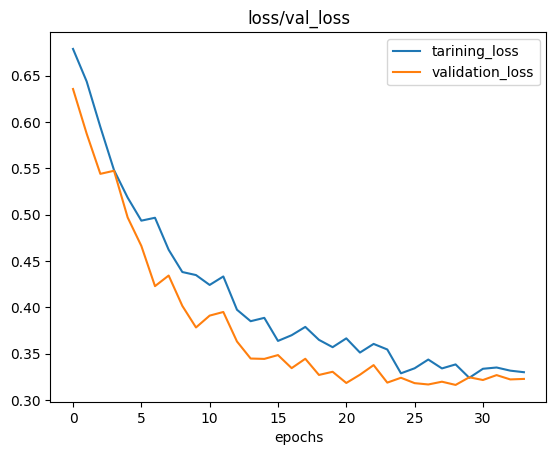

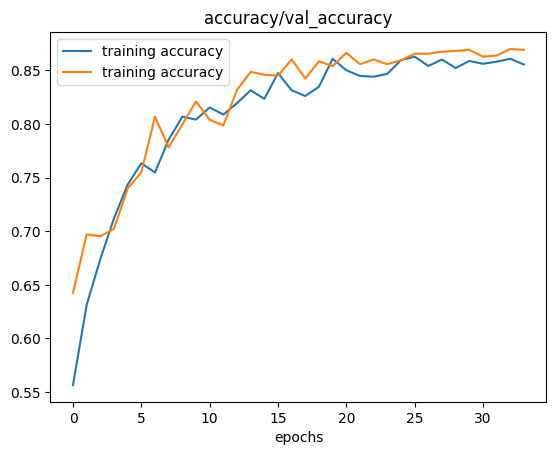

In [53]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

keras.utils.set_random_seed(42)

data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(20/360),        # ≈ rotation_range=20
    keras.layers.RandomTranslation(0.2, 0.2),   # ≈ width/height shift 20%
    keras.layers.RandomZoom(0.2),               # ≈ zoom_range=0.2
], name="data_augmentation")

model_6 = Sequential([
    keras.layers.Input(shape=(img_height, img_width, 3)),

    data_augmentation,
    keras.layers.Rescaling(1./255),

    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),

    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),

    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),

    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),

    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=2,
        min_lr=1e-6,
        verbose=1
    ),
    tensorboard_callback
]

model_6.summary()

history_6 = model_6.fit(
    train_ds, 
    validation_data=test_ds,
    epochs=50,
    verbose=1, 
    callbacks=callbacks
)

plot_loss_curves(history_6)


In [54]:
model_6.evaluate(test_ds)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8614 - loss: 0.3336


[0.31634631752967834, 0.8680927157402039]

## To improve our model 

1. More model layers
2. increase the number of filters in each conv layer
3. Train for longer
4. Find an ideal learning
5. Get more data
6. Use Transfer learning to leverage another model and adjust for our use case 

In [55]:
## Making prediction with our own custom data 

print(class_names)

['pizza', 'steak']


In [57]:
valid_dir = "../data/pizza_steak/valid/" 

valid_ds = tf.keras.utils.image_dataset_from_directory(
    valid_dir, 
    image_size=(224, 224), 
    shuffle=False, 
    batch_size=32
) 

print(valid_ds.class_names)
valid_ds = valid_ds.cache().prefetch(tf.data.AUTOTUNE)

Found 360 files belonging to 2 classes.
['pizza', 'steak']


In [58]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# True labels in the exact dataset order
y_true = np.concatenate([y.numpy() for _, y in valid_ds], axis=0)

# Predicted probabilities/logits in the exact same order
pred_probs = model_6.predict(valid_ds, verbose=0)

In [59]:
pred_probs[:10]

array([[2.9940091e-02],
       [1.0102969e-02],
       [5.2051479e-04],
       [5.4323021e-02],
       [2.3515146e-02],
       [7.1234375e-01],
       [4.1022412e-02],
       [1.1972998e-01],
       [3.4728933e-02],
       [3.0631524e-01]], dtype=float32)

In [60]:
y_pred = np.round(np.squeeze(pred_probs))

In [61]:
y_pred

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [62]:
from sklearn.metrics import confusion_matrix

y_true = np.concatenate([y.numpy() for x, y in valid_ds], axis=0) 

confusion_matrix = confusion_matrix(y_true, y_pred)

In [64]:
confusion_matrix

array([[150,  25],
       [ 26, 159]])

In [63]:
model_6.evaluate(valid_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8627 - loss: 0.2817


[0.2840624749660492, 0.8583333492279053]

In [65]:
img = tf.io.read_file("../data/pizza_steak/valid/steak/000004.jpg")
img = tf.image.decode_image(img, channels=3)
img = tf.image.resize(img, size=(224, 224)) 
img.shape

TensorShape([224, 224, 3])

In [66]:
img_pred = model_6.predict(tf.expand_dims(img, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


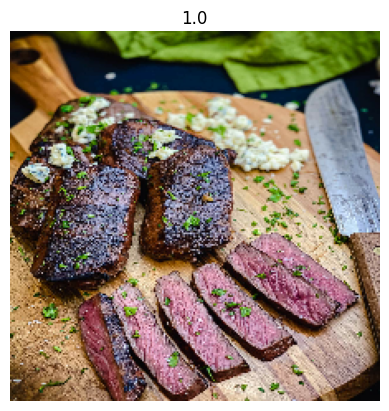

In [67]:
plt.imshow(tf.cast(img, tf.uint8))
plt.title(np.round(np.squeeze(img_pred))) 
plt.axis("off") 
plt.show();

In [84]:
## Create an image and resize it 

def load_and_prep_image(filename, image_shape=(224, 224)): 
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3) 
    img = tf.image.resize(img, size=image_shape)
    return (tf.expand_dims(img, axis=0))

In [95]:
def predict_and_view_an_image(model, filename, class_names=class_names):
    img = load_and_prep_image(filename)          # (1, 224, 224, 3)
    prob = model.predict(img)                    # e.g. [[0.87]]

    # show image (remove batch dim)
    plt.imshow(tf.cast(img[0], tf.uint8))        # (224, 224, 3)

    # binary class id
    p = float(np.squeeze(prob))                  # scalar like 0.87
    cls = int(p >= 0.5)

    plt.title(f"Prediction: {class_names[cls]} (p={p:.2f})")
    plt.axis("off")
    plt.show()

In [87]:
img.shape

TensorShape([1, 224, 224, 3])

In [86]:
img = load_and_prep_image(filename="../data/pizza_steak/valid/steak/000095.jpg")
# prob = model_6.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


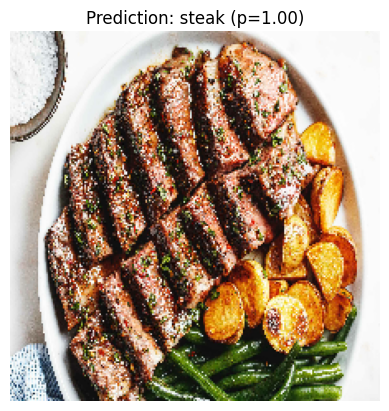

In [101]:
predict_and_view_an_image(model=model_6, 
                          filename="../data/pizza_steak/valid/steak/000018.jpg")